In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.ensemble import GradientBoostingClassifier
from pprint import pprint
import seaborn as sns
from matplotlib import pyplot as plt
import os
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
mutationRate = .05
os.path.isfile('/Users/16786/Desktop/fraud.csv')

df= pd.read_csv('/Users/16786/Desktop/fraud.csv')

df.head(5)

iterations = 100


fitnessArray = []
maxCost = 0

In [2]:
def binaryConversion(a, b):
    sum = 0
    factor = 1
    for x in range(0, b):
        sum += a[(b-1)-x] * factor
        factor = factor * 2
    return sum

In [3]:
df['is_train'] = np.random.uniform(0,1,len(df)) <= .50
#del df['isFlaggedFraud']
#for i in range (0, len(df)):
    #if((df.iat[i,4] - df.iat[i,5]df.iat[i,4] - df.iat[i,5]) == df.iat[i,2]):
#    if(df.iat[i,5] == df.iat[i,3]):
#         df.iat[i,0] = 1
features = df.columns[:9]

print(features)
df.head(5)

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest'],
      dtype='object')


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,is_train
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,True
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,False
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,True
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,True


In [4]:
stacked = df[['type','nameOrig','nameDest']].stack()
df[['type','nameOrig','nameDest']] = pd.Series(stacked.factorize()[0], index=stacked.index).unstack()

In [5]:
train, test = df[df['is_train']==True], df[df['is_train']==False]
#train[is_train] = df['is_train'] = np.random.uniform(0,1,len(df['is_train'])) <= .78
print(len(train))
print(len(test))
y = train['isFraud']
x = train[features]
print('hi')

3182803
3179817
hi


In [6]:
numberItems = 6
nb1 = 5
nb2 = 5
nb3 = 5
from sklearn.metrics import precision_score


In [7]:
results = [1 for x in range(10)]

for j in range(1, 10):
    iterations = j
    populationSize = 8
    paras1 = [0 for x in range(numberItems)]
    fitnessArray = [0 for x in range(populationSize)]
    maxCost = 0
    paras1 = [0 for x in range(numberItems)]
    populationArray = [[0 for x in range(numberItems)] for y in range(populationSize)]
    populationArray1 = [[0 for x in range(nb1)] for y in range(populationSize)]
    populationArray2 = [[0 for x in range(nb2)] for y in range(populationSize)]
    populationArray3 = [[0 for x in range(nb2)] for y in range(populationSize)]

    #make n random bit arrays as the input 0 or 1 to indicate if an item is in the bag 
    for i in range (0, populationSize):
        for n in range(0, numberItems):
            r = random.uniform(0, 1)
            if(r <= .5):
                populationArray[i][n] = 0
            if(r >= .5):
                populationArray[i][n] = 1
    for i in range (0, populationSize):
        for n in range(0, nb1):
            r = random.uniform(0, 1)
            if(r <= .5):
                populationArray1[i][n] = 0
            if(r >= .5):
                populationArray1[i][n] = 1
    for i in range (0, populationSize):
        for n in range(0, nb2):
            r = random.uniform(0, 1)
            if(r <= .5):
                populationArray2[i][n] = 0
            if(r >= .5):
                populationArray2[i][n] = 1
    for i in range (0, populationSize):
        for n in range(0, nb3):
            r = random.uniform(0, 1)
            if(r <= .5):
                populationArray3[i][n] = 0
            if(r >= .5):
                populationArray3[i][n] = 1
#The fitness functions will be 
# if sum(wieght <= bagsize) fitness = sum(cost)
# if sum(wieght > bagsize) fitness = 0
# next the fitness array will be populated
    for i in range(0, populationSize):
        n1 = binaryConversion(populationArray[i], 6)+1
        n2 = binaryConversion(populationArray1[i], 5)+2
        n3 = binaryConversion(populationArray2[i], 5)+1
        n4 = binaryConversion(populationArray2[i], 5)+5

        clf= RandomForestClassifier(n_jobs=2,random_state=0,n_estimators = n4,criterion = "entropy", max_features = 'sqrt',
max_depth = n1, min_samples_split = n2, min_samples_leaf = 2, max_leaf_nodes = None, min_impurity_decrease = 0, class_weight = "balanced_subsample")
        clf.fit(train[features],y)
        clf.predict(test[features])
        pred= clf.predict(test[features]) 
        fitnessArray[i] = recall_score(y_true = test['isFraud'], y_pred = pred)

    #next is the crossover and determination of what samples get to stay in the population
#the top 1/4 of predictions will get to stay in the population with the bottom 3/4 being crossed
#the center point of the cross will be random
    stayNub = int(populationSize/4)
    numbNew = len(populationArray) - stayNub
    finalSack = [0 for x in range(populationSize)]
    finalSack1 = [0 for x in range(populationSize)]
    finalSack2 = [0 for x in range(populationSize)]
    finalSack3 = [0 for x in range(populationSize)]

    a = [0 for x in range(stayNub)]
    for m in range(0, iterations):
        for i in range(0, populationSize):
            n1 = binaryConversion(populationArray[i], 6)+1
            n2 = binaryConversion(populationArray1[i], 5)+2
            n3 = binaryConversion(populationArray2[i], 5)+1
            n4 = binaryConversion(populationArray3[i], 5)+5
            clf= RandomForestClassifier(n_jobs=2,random_state=0,n_estimators = n4,criterion = "gini", max_features = 'sqrt', max_depth = n1, 
    min_samples_split = n2, min_samples_leaf = n3, max_leaf_nodes = None, min_impurity_decrease = 0, class_weight = "balanced_subsample")
            clf.fit(train[features],y)
            clf.predict(test[features])
            pred= clf.predict(test[features]) 
            fitnessArray[i] = recall_score(y_true = test['isFraud'], y_pred = pred)
            if(max(fitnessArray) > maxCost):
                maxCost = max(fitnessArray)
                finalSack = populationArray[fitnessArray.index(max(fitnessArray))]
                finalSack1 = populationArray1[fitnessArray.index(max(fitnessArray))]
                finalSack2 = populationArray2[fitnessArray.index(max(fitnessArray))]
                finalSack3 = populationArray3[fitnessArray.index(max(fitnessArray))]

                #preserve the current best cost and items 
                items = populationArray[fitnessArray.index(max(fitnessArray))]
        for i in range(0, stayNub):
            a[i] = fitnessArray.index(max(fitnessArray))
            fitnessArray[fitnessArray.index(max(fitnessArray))] = -1
            
    #preserve the current best cost and items 
    #do the crossover 
    #pick random point to swap from
        r = int(random.uniform(1, numberItems))
        temp1 = [0 for x in range(0, r)]
        temp2 = [0 for x in range(r, numberItems)]
        temp3 = [0 for x in range(0, r)]
        temp4 = [0 for x in range(r, numberItems)]
        temp5 = [0 for x in range(0, len(a))]
        temp6 = [0 for x in range(0, len(populationArray))]

        for i in range(0, len(a)):
            temp5[i] = populationArray[a[i]]
        for i in range(0, populationSize-1):
                r1 = int(random.uniform(0, numberItems-1))
                r2 = int(random.uniform(0, numberItems-1))
                temp1 = populationArray[r1][0:r]
#                temp2 = populationArray[r2][r:len(populationArray)]
#                temp3 = populationArray[r1][0:r]
                temp4 = populationArray[r2][r:len(populationArray)]
        
                temp6[i] = temp1+temp4
        for i in range(0, len(a)):
            temp6[a[i]] = temp5[i]
        for i in range(0, populationSize-1):
            populationArray1[i] = temp6[i]
        r = int(random.uniform(1, nb1))
        temp1 = [0 for x in range(0, r)]
        temp2 = [0 for x in range(r, nb1)]
        temp3 = [0 for x in range(0, r)]
        temp4 = [0 for x in range(r, nb1)]
        temp5 = [0 for x in range(0, len(a))]
        temp6 = [0 for x in range(0, len(populationArray1))]

        for i in range(0, len(a)):
            temp5[i] = populationArray1[a[i]]
        for i in range(0, populationSize-1):
                r1 = int(random.uniform(0, nb1-1))
                r2 = int(random.uniform(0, nb1-1))
                temp1 = populationArray1[r1][0:r]
#                temp2 = populationArray[r2][r:len(populationArray)]
#                temp3 = populationArray[r1][0:r]
                temp4 = populationArray1[r2][r:len(populationArray1)]
        
                temp6[i] = temp1+temp4
        for i in range(0, len(a)):
            temp6[a[i]] = temp5[i]
        for i in range(0, populationSize-1):
            populationArray1[i] = temp6[i]
        r = int(random.uniform(1, nb2))
        temp1 = [0 for x in range(0, r)]
        temp2 = [0 for x in range(r, nb2)]
        temp3 = [0 for x in range(0, r)]
        temp4 = [0 for x in range(r, nb2)]
        temp5 = [0 for x in range(0, len(a))]
        temp6 = [0 for x in range(0, len(populationArray2))]

        for i in range(0, len(a)):
            temp5[i] = populationArray2[a[i]]
        for i in range(0, populationSize-1):
                r1 = int(random.uniform(0, nb2-1))
                r2 = int(random.uniform(0, nb2-1))
                temp1 = populationArray2[r1][0:r]
#                temp2 = populationArray[r2][r:len(populationArray)]
#                temp3 = populationArray[r1][0:r]
                temp4 = populationArray2[r2][r:len(populationArray2)]
        
                temp6[i] = temp1+temp4
        for i in range(0, len(a)):
            temp6[a[i]] = temp5[i]
        for i in range(0, populationSize-1):
            populationArray2[i] = temp6[i]
        r = int(random.uniform(1, nb3))
        temp1 = [0 for x in range(0, r)]
        temp2 = [0 for x in range(r, nb3)]
        temp3 = [0 for x in range(0, r)]
        temp4 = [0 for x in range(r, nb3)]
        temp5 = [0 for x in range(0, len(a))]
        temp6 = [0 for x in range(0, len(populationArray3))]

        for i in range(0, len(a)):
            temp5[i] = populationArray3[a[i]]
        for i in range(0, populationSize-1):
                r1 = int(random.uniform(0, nb3-1))
                r2 = int(random.uniform(0, nb3-1))
                temp1 = populationArray3[r1][0:r]
#                temp2 = populationArray[r2][r:len(populationArray)]
#                temp3 = populationArray[r1][0:r]
                temp4 = populationArray3[r2][r:len(populationArray3)]
        
                temp6[i] = temp1+temp4
        for i in range(0, len(a)):
            temp6[a[i]] = temp5[i]
        for i in range(0, populationSize-1):
            populationArray3[i] = temp6[i]
# preform mutations
        for i in range(0, populationSize):
            for n in range(0, numberItems):
                r = random.uniform(0, 1)
                if(r <= .15):
                    k = populationArray[i][n]
                    if(k == 1):
                        populationArray[i][n] = 0
                    if(k == 0):
                        populationArray[i][n] = 1
        for i in range(0, populationSize):
            for n in range(0, nb1):
                r = random.uniform(0, 1)
                if(r <= .15):
                    k = populationArray1[i][n]
                    if(k == 1):
                        populationArray1[i][n] = 0
                    if(k == 0):
                        populationArray1[i][n] = 1
        for i in range(0, populationSize):
            for n in range(0, nb2):
                r = random.uniform(0, 1)
                if(r <= .15):
                    k = populationArray2[i][n]
                    if(k == 1):
                        populationArray2[i][n] = 0
                    if(k == 0):
                        populationArray2[i][n] = 1
        for i in range(0, populationSize):
            for n in range(0, nb3):
                r = random.uniform(0, 1)
                if(r <= .3):
                    k = populationArray3[i][n]
                    if(k == 1):
                        populationArray3[i][n] = 0
                    if(k == 0):
                        populationArray3[i][n] = 1
        
    print(maxCost)
    print(finalSack)
    print(finalSack1)
    print(finalSack2)
    print(finalSack3)

    results[j] = maxCost
print(results)

0.9690341607274514
[0, 0, 0, 0, 1, 1]
[1, 0, 0, 0, 1]
[1, 1, 1, 1, 1]
[1, 1, 0, 1, 1]
0.9936102236421726
[1, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 1]
[0, 1, 0, 0, 0]
[0, 0, 0, 0, 0]
0.9729663307938068
[0, 0, 0, 1, 0, 1]
[1, 1, 1, 0, 1, 0]
[0, 0, 0, 1, 1]
[0, 1, 1, 1, 0]
0.9842713197345785
[1, 1, 1, 0, 0, 1]
[0, 1, 1, 0, 1, 1]
[0, 0, 0, 1, 1]
[1, 1, 0, 0, 0]
0.9835340378471369
[1, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 1]
[0, 1, 0, 1, 0]
[1, 0, 1, 0, 1]
0.9761612189727206
[1, 1, 0, 0, 0, 1]
[1, 1, 0, 0, 0, 1]
[1, 1, 0, 0, 1]
[0, 1, 0, 0, 1]
0.9943475055296142
[1, 1, 0, 0, 1, 0]
[1, 1, 1, 1, 0]
[0, 1, 1, 0, 1]
[1, 0, 0, 0, 1]
0.9805849102973704
[0, 1, 1, 0, 1, 1]
[0, 1, 1, 0, 1, 1]
[1, 1, 0, 1, 0]
[0, 1, 1, 0, 1]
0.990661096092406
[1, 0, 1, 1, 0, 1]
[1, 0, 0, 0, 1, 1]
[0, 0, 1, 1, 0]
[1, 1, 0, 0, 1]
[1, 0.9690341607274514, 0.9936102236421726, 0.9729663307938068, 0.9842713197345785, 0.9835340378471369, 0.9761612189727206, 0.9943475055296142, 0.9805849102973704, 0.990661096092406]


In [18]:
print(results)
print(xtest)
results = [0.9690341607274514, 0.9936102236421726, 0.9729663307938068, 0.9842713197345785, 0.9835340378471369, 0.9761612189727206, 0.9943475055296142, 0.9805849102973704, 0.990661096092406]

[0.9690341607274514, 0.9936102236421726, 0.9729663307938068, 0.9842713197345785, 0.9835340378471369, 0.9761612189727206, 0.9943475055296142, 0.9805849102973704, 0.990661096092406]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


9
9


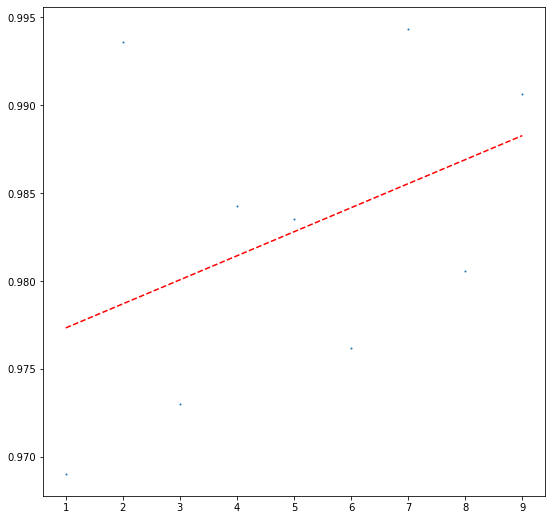

In [36]:

xtest = np.linspace(1,9,9)
plt.rcParams['figure.figsize'] = (9, 9)
print(len(xtest))
print(len(results))
plt.scatter(xtest, results, 1)
z = np.polyfit(xtest, results, 1)
p = np.poly1d(z)
plt.plot(xtest,p(xtest),'--r')
plt.show()

In [18]:
print(results)\
0.8675589547482474
[0, 0, 1, 1, 1, 0, 1, 1]
[0, 0, 0, 1, 0, 1, 1, 0]
[1, 0, 0, 1, 1, 1, 1, 1]
0.8731593903384138
[1, 1, 0, 0, 1, 0, 1, 0]
[0, 0, 0, 1, 0, 0, 1, 1]
[0, 0, 1, 0, 1, 0, 0, 0]
0.8797709923664121
[1, 0, 0, 1, 0, 1, 1, 0]
[0, 0, 0, 0, 0, 1, 0, 0]
[1, 0, 1, 0, 0, 1, 1, 0]
0.845873786407767
[0, 1, 0, 1, 1, 1, 1, 0]
[1, 0, 1, 1, 1, 0, 0, 0]
[0, 0, 1, 1, 0, 0, 0, 0]

0.7918306563131581
[1, 1, 1, 1, 0, 0, 1, 0]
[0, 1, 0, 0, 1, 1, 0, 1]
[1, 0, 1, 1, 0, 0, 1, 0]
0.8837447243893081
[0, 1, 1, 1, 1, 1, 0, 0]
[0, 0, 0, 0, 1, 1, 1, 0]
[1, 0, 1, 1, 1, 1, 0, 0]
0.8762336623099493
[0, 1, 1, 0, 0, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 1, 0]
[0, 1, 1, 1, 0, 0, 0, 1]
0.8577235772357724
[1, 1, 1, 0, 1, 0, 1, 1]
[0, 0, 1, 0, 0, 1, 0, 0]
[1, 0, 0, 1, 0, 0, 1, 1]


0.8078048780487804
[0, 0, 0, 1, 1, 0, 0, 1]
[0, 1, 0, 0, 0, 1, 1, 1]
[0, 1, 1, 1, 1, 0, 0, 0]
0.8714233083630111
[1, 0, 1, 1, 1, 0, 1, 1]
[0, 0, 0, 1, 1, 1, 0, 1]
[0, 1, 1, 1, 0, 0, 0, 0]
0.8425324675324676
[0, 1, 0, 0, 0, 0, 0, 1]
[0, 0, 1, 0, 1, 1, 1, 0]
[1, 0, 1, 1, 0, 0, 1, 0]
0.8832783557472723
[1, 0, 1, 1, 0, 0, 1, 1]
[0, 0, 0, 1, 0, 0, 0, 1]
[0, 1, 1, 0, 0, 0, 1, 1]
0.8832783557472723
[1, 0, 1, 0, 1, 0, 1, 1]
[0, 0, 0, 1, 0, 0, 0, 1]
[1, 1, 0, 0, 0, 0, 1, 0]
0.8817430108938182
[0, 1, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 0, 1, 1, 1]
[1, 0, 1, 1, 0, 1, 0, 1]
0.8819570282164121
[1, 0, 1, 1, 0, 0, 1, 0]
[0, 0, 0, 0, 1, 0, 1, 1]
[0, 1, 0, 0, 0, 1, 0, 0]
0.868723532970357
[0, 0, 0, 1, 0, 1, 1, 0]
[0, 0, 1, 0, 0, 0, 1, 1]
[0, 1, 1, 1, 1, 1, 0, 1]
0.8331418064812687
[1, 0, 1, 1, 1, 0, 1, 1]
[1, 0, 1, 1, 1, 0, 1, 1]
[0, 1, 1, 1, 0, 1, 1, 1]

SyntaxError: invalid syntax (<ipython-input-18-d973da229a43>, line 2)